In [2]:
from imports import *
%matplotlib inline

## Practicing with DataArray ##

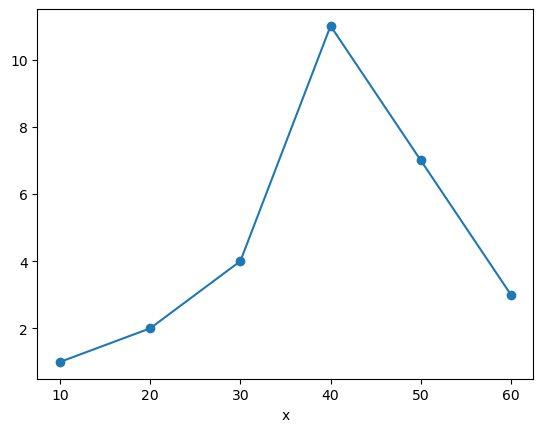

In [3]:
da = xr.DataArray([1,2,4,11,7,3], 
                  dims = ['x'],
                  coords={'x': [10, 20, 30, 40, 50, 60]})

# da.indexes
da.plot(marker = 'o')

### Multidimensional DataArray ###

In [4]:
## Importing multidimensional ARGO data 
url = 'https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip'
files = pooch.retrieve(url, processor = pooch.Unzip(), known_hash = "2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files.sort()

## Manually load the files into separate nmupy array variables
## There are 7 different sets of data. This is inefficient, but still
## working towards using Datasets fully
pressure = np.load(files[0])
salinity = np.load(files[1])
temp = np.load(files[2])
date = np.load(files[3])
lat = np.load(files[4])
levels = np.load(files[5])
lon = np.load(files[6])


#### Messing with the salinity data ####

In [5]:
da_salinity = xr.DataArray(salinity, 
                           dims = ['level', 'date'],
                           coords={'level':levels,
                                   'date':date},)
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...

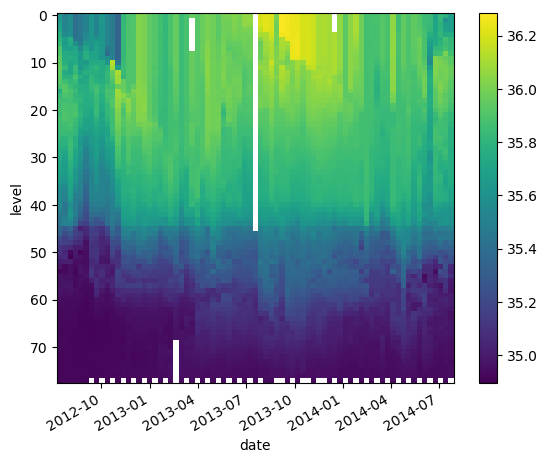

In [6]:
## PLotting the data, yincrease set to false, so the depth (level variable I think?) is more
## visually intuitive
da_salinity.plot(yincrease = False)

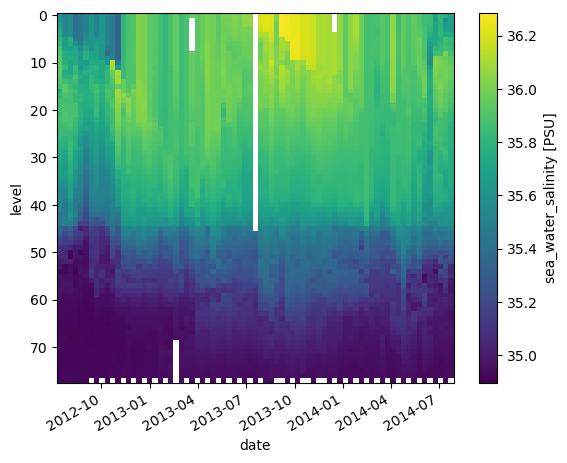

In [7]:
## Adding additional attribute data
da_salinity.attrs['units'] = 'PSU' # practical salinity unit, equiv to g/kg or ppt
da_salinity.attrs['standard_name'] = 'sea_water_salinity'

## Revises the plot automatically
da_salinity.plot(yincrease = False)

## Practice  with Dataset ##

In [8]:
## Using temperature, salinity, and pressure data to form a Dataset
argo = xr.Dataset(
    data_vars={
        'salinity': (('level', 'date'), salinity),
        'temperature': (('level', 'date'), temp),
        'pressure': (('level', 'date'), pressure)
    },
    coords = {
        'level': levels,
        'date': date
    }
)
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [9]:
# Add in lon and lat after the fact, and give dimension of date to each of them
argo.coords['lon'] = ('date', lon)
argo.coords['lat'] = ('date', lat)
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

## Selecting Data (Indexing) ##

In [11]:
## This selects for the salinity data across a range of dates (and locations)
## limited at a certain depth, that is level 2 
## (I don't actually know what the levels correspond to in meters)
argo.salinity[2]

<xarray.DataArray 'salinity' (date: 75)>
array([35.6819458 , 35.52595901, 35.57297134, 35.40494537, 35.45091629,
       35.50192261, 35.62397766, 35.51696014, 35.62797546, 35.52292252,
       35.47383118, 35.33785629, 35.81896591, 35.88694   , 35.90187836,
       36.02391815, 36.00475693, 35.94187927, 35.91583252, 35.86392212,
       35.81995392, 35.88601303, 35.95079422, 35.84091568, 35.87992477,
               nan, 35.92179108, 35.96979141, 36.0008316 , 35.98083115,
       35.92887878, 35.98091888, 35.9838829 , 36.01884842, 35.99092484,
       36.04689026, 36.04185867,         nan, 36.19193268, 36.22789764,
       36.20986557, 35.97589874, 36.2779007 , 36.25889969, 36.2418251 ,
       36.23685837, 36.19781876, 36.19785309, 36.17692184, 36.1048851 ,
       36.11392212, 36.09080505,         nan, 36.05675888, 35.93374634,
       36.04291534, 36.10183716, 35.97779083, 35.86592102, 35.87791824,
       35.88392258, 35.92078781, 35.88601303, 36.05178833, 35.85883713,
       35.94878769, 35.8938446 , 35.94379425, 35.90884018, 35.84893036,
       35.83496857, 35.71691132, 35.79592896, 35.66290665, 35.66591263])
Coordinates:
    level    int64 2
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

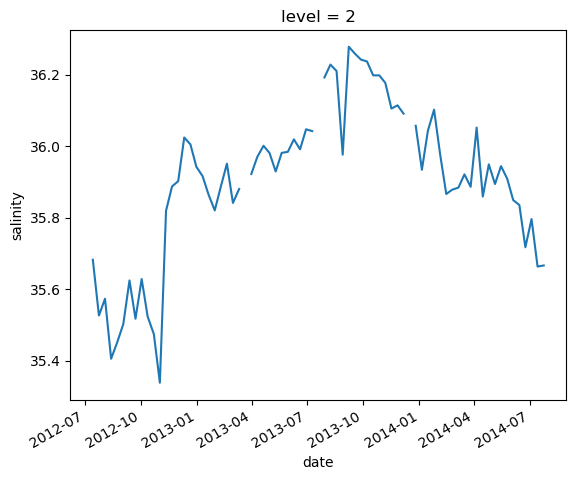

In [12]:
# Use built in plot feature to automatically plot the salinity over the 
# given time frame at a depth of level 2
argo.salinity[2].plot()

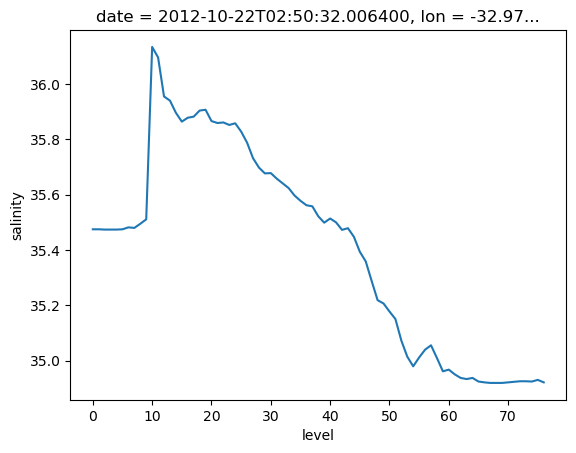

In [15]:
## Select for all levels (all depths, level 0 to 77)
## Select the 10th index for date, that is 2012-10-22...
## It will also select for the specific associated longitude and latitude where this measurement was taken
argo.salinity[:, 10]

## Now plot the result
## Note that this plot is accurate, but the axes are not necessarily the most sensical
argo.salinity[:, 10].plot()

Better practice: use xarray's `.sel()` method. It allows for much more explicit label based indexing, making both the code and the process clearer.

In [16]:
## Same effect as argo.salinity[2], much clearer
argo.salinity.sel(level = 2)

<xarray.DataArray 'salinity' (date: 75)>
array([35.6819458 , 35.52595901, 35.57297134, 35.40494537, 35.45091629,
       35.50192261, 35.62397766, 35.51696014, 35.62797546, 35.52292252,
       35.47383118, 35.33785629, 35.81896591, 35.88694   , 35.90187836,
       36.02391815, 36.00475693, 35.94187927, 35.91583252, 35.86392212,
       35.81995392, 35.88601303, 35.95079422, 35.84091568, 35.87992477,
               nan, 35.92179108, 35.96979141, 36.0008316 , 35.98083115,
       35.92887878, 35.98091888, 35.9838829 , 36.01884842, 35.99092484,
       36.04689026, 36.04185867,         nan, 36.19193268, 36.22789764,
       36.20986557, 35.97589874, 36.2779007 , 36.25889969, 36.2418251 ,
       36.23685837, 36.19781876, 36.19785309, 36.17692184, 36.1048851 ,
       36.11392212, 36.09080505,         nan, 36.05675888, 35.93374634,
       36.04291534, 36.10183716, 35.97779083, 35.86592102, 35.87791824,
       35.88392258, 35.92078781, 35.88601303, 36.05178833, 35.85883713,
       35.94878769, 35.8938446 , 35.94379425, 35.90884018, 35.84893036,
       35.83496857, 35.71691132, 35.79592896, 35.66290665, 35.66591263])
Coordinates:
    level    int64 2
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

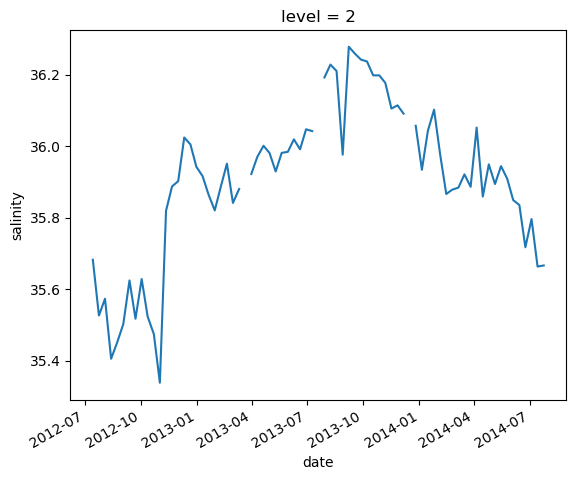

In [17]:
argo.salinity.sel(level=2).plot()

## Accessing netCDF Files ##

In [2]:
## Accessing Practice Data from NASA GISTemp Global Temperature Anomaly Dataset
gisdata = pooch.retrieve('https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz',
    known_hash = None,
    processor=pooch.Decompress(),)

# Converting to an xarray object, gissdata is currently a netCDF
ds = xr.open_dataset(gisdata)
print(ds)

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1721, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-05-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-06-12 11:10:33 by SBBX_to_nc 2.0 - ILAND=1200,...


<xarray.DataArray 'nv' (nv: 2)>
array([0, 1])
Dimensions without coordinates: nv